In [10]:

import json
 
# Opening JSON file
f = open('test_cases/test_cases.json',)
 
# returns JSON object as
# a dictionary
data = json.load(f)
 
# Iterating through the json
# list
idx = []
inputs = []
outputs = []
expected = []

for i in data['ex']:
    #print(i)
    
    idx.append(i['idx'])
    inputs.append(i['input'])
    outputs.append(i['prediction'])
    expected.append(i['expected'])
 
# Closing file
f.close()

In [11]:
import pandas as pd
df = pd.DataFrame()
df['idx'] = idx
df['input'] = inputs
df['output'] = outputs
df['expected'] = expected
df = df.iloc[:700]
df

,idx,input,output,expected
0,0,[MALE] is skiing . [MALE] falls off his skis ....,[FEMALE] was a very good friend of mine was a ...,[MALE] has broken his leg skiing .
1,1,[MALE] let his friend borrow his phone . the f...,"[FEMALE] was a little girl, [FEMALE] was a lit...",the phone died shortly after .
2,2,[FEMALE] asked her boyfriend to buy some coat ...,[FEMALE]'s mom told him to go to the store to ...,she had to go back and get the right kind .
3,3,[MALE] was driving to work . he got pulled ove...,"[FEMALE] was driving to [FEMALE]'s house, [FAL...",[MALE] agreed to fix it and only got a warning .
4,4,[MALE] 's mailman was n't very competent . whe...,"[FEMALE] was a very good man, [MALE], and she ...",the new mailman was happy to have [MALE] as a ...
...,...,...,...,...
695,695,our teacher told us that we have a report due ...,[FEMALE] friend [MALE] was a little nervous ab...,[FEMALE] teacher allowed me to email my report...
696,696,i found some old mix tapes . these mix tapes w...,[FEMALE] son [MALE] was a [MALE]'s son.,i did find it funny however knowing what music...
697,697,i last visited fenway park in [NEUTRAL] of 201...,[FEMALE] wife was very sad to see [FEMALE] [MA...,i never went back to fenway park .
698,698,[NEUTRAL] loved saving money . she found coupo...,[FEMALE] was a [FEMALE]'s mom told her to go.,it made the ice cream taste even better !


<AxesSubplot:>

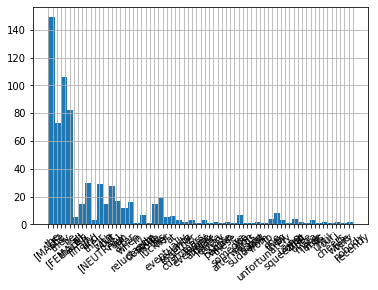

In [3]:
display(df.expected.apply(lambda x: x.split()[0]).hist(bins = 50, xrot = 40))

<AxesSubplot:>

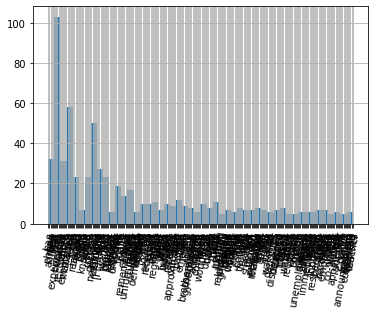

In [4]:
display(df.expected.apply(lambda x: x.split()[1]).hist(xrot = 80, bins = 50 ))

<AxesSubplot:>

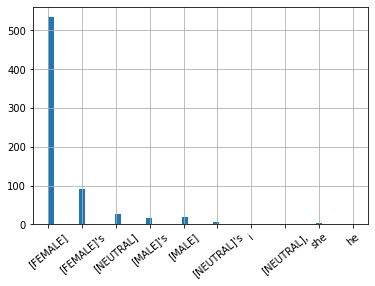

In [5]:
display(df.output.apply(lambda x: x.split()[0]).hist(bins = 50, xrot = 40))

<AxesSubplot:>

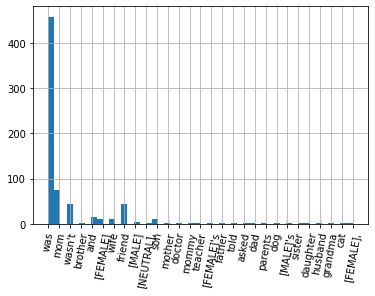

In [6]:
display(df.output.apply(lambda x: x.split()[1] if len(x.split())>1 else None).hist(xrot = 80, bins = 50 ))

In [7]:
output_lens = []
for i in range(5):
    output_lens.append(len(df.output.apply(lambda x: x.split()[i] if len(x.split())>i else None).unique()))
    
expected_lens = []
for i in range(5):
    expected_lens.append(len(df.expected.apply(lambda x: x.split()[i] if len(x.split())>i else None).unique()))

In [8]:
print('Printing the number of unique words at the first 5 word positions')
print('predicted sentence ', output_lens, '->mean: ', sum(output_lens)/5)

Printing the number of unique words at the first 5 word positions
predicted sentence  [10, 29, 29, 61, 89] ->mean:  43.6


In [9]:
print('expected sentence ', expected_lens, '->mean: ',sum(expected_lens)/5)

expected sentence  [73, 269, 303, 344, 324] ->mean:  262.6
